# ML Project on the Classification of Mushrooms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing,tree
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import feature_selection
%matplotlib inline

In [2]:
df=pd.read_csv("mushroom_data.csv")
df.shape

(61069, 21)

In [3]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


## Converting String/Char Values to Int

In [4]:
le_cap_shape=preprocessing.LabelEncoder()
le_cap_shape.fit(df['cap-shape'])
df['cap-shape']=le_cap_shape.transform(df['cap-shape'])

le_cap_surface=preprocessing.LabelEncoder()
le_cap_surface.fit(df['cap-surface'])
df['cap-surface']=le_cap_surface.transform(df['cap-surface'])

le_cap_color=preprocessing.LabelEncoder()
le_cap_color.fit(df['cap-color'])
df['cap-color']=le_cap_color.transform(df['cap-color'])

le_gill_color=preprocessing.LabelEncoder()
le_gill_color.fit(df['gill-color'])
df['gill-color']=le_gill_color.transform(df['gill-color'])

le_stem_color=preprocessing.LabelEncoder()
le_stem_color.fit(df['stem-color'])
df['stem-color']=le_stem_color.transform(df['stem-color'])

le_has_ring=preprocessing.LabelEncoder()
le_has_ring.fit(df['has-ring'])
df['has-ring']=le_has_ring.transform(df['has-ring'])

le_habitat=preprocessing.LabelEncoder()
le_habitat.fit(df['habitat'])
df['habitat']=le_habitat.transform(df['habitat'])

le_class=preprocessing.LabelEncoder()
le_class.fit(df['class'])
df['class']=le_class.transform(df['class'])

le_does_bruise=preprocessing.LabelEncoder()
le_does_bruise.fit(df['does-bruise-or-bleed'])
df['does-bruise-or-bleed']=le_does_bruise.transform(df['does-bruise-or-bleed'])

le_gill_attachment=preprocessing.LabelEncoder()
le_gill_attachment.fit(df['gill-attachment'])
df['gill-attachment']=le_gill_attachment.transform(df['gill-attachment'])

le_stem_root=preprocessing.LabelEncoder()
le_stem_root.fit(df['stem-root'])
df['stem-root']=le_stem_root.transform(df['stem-root'])

le_stem_surface=preprocessing.LabelEncoder()
le_stem_surface.fit(df['stem-surface'])
df['stem-surface']=le_stem_surface.transform(df['stem-surface'])

le_veil_type=preprocessing.LabelEncoder()
le_veil_type.fit(df['veil-type'])
df['veil-type']=le_veil_type.transform(df['veil-type'])

le_veil_color=preprocessing.LabelEncoder()
le_veil_color.fit(df['veil-color'])
df['veil-color']=le_veil_color.transform(df['veil-color'])

le_ring_type=preprocessing.LabelEncoder()
le_ring_type.fit(df['ring-type'])
df['ring-type']=le_ring_type.transform(df['ring-type'])

le_season=preprocessing.LabelEncoder()
le_season.fit(df['season'])
df['season']=le_season.transform(df['season'])


In [5]:
df=df.drop(['gill-spacing','spore-print-color'],axis=1)
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,habitat,season
0,1,15.26,6,2,6,0,2,10,16.95,17.09,4,7,11,0,4,1,2,0,3
1,1,16.60,6,2,6,0,2,10,17.99,18.19,4,7,11,0,4,1,2,0,2
2,1,14.07,6,2,6,0,2,10,17.80,17.74,4,7,11,0,4,1,2,0,3
3,1,14.17,2,3,1,0,2,10,15.77,15.98,4,7,11,0,4,1,5,0,3
4,1,14.64,6,3,6,0,2,10,16.53,17.20,4,7,11,0,4,1,5,0,3


### Visualizing the correlation between all the features

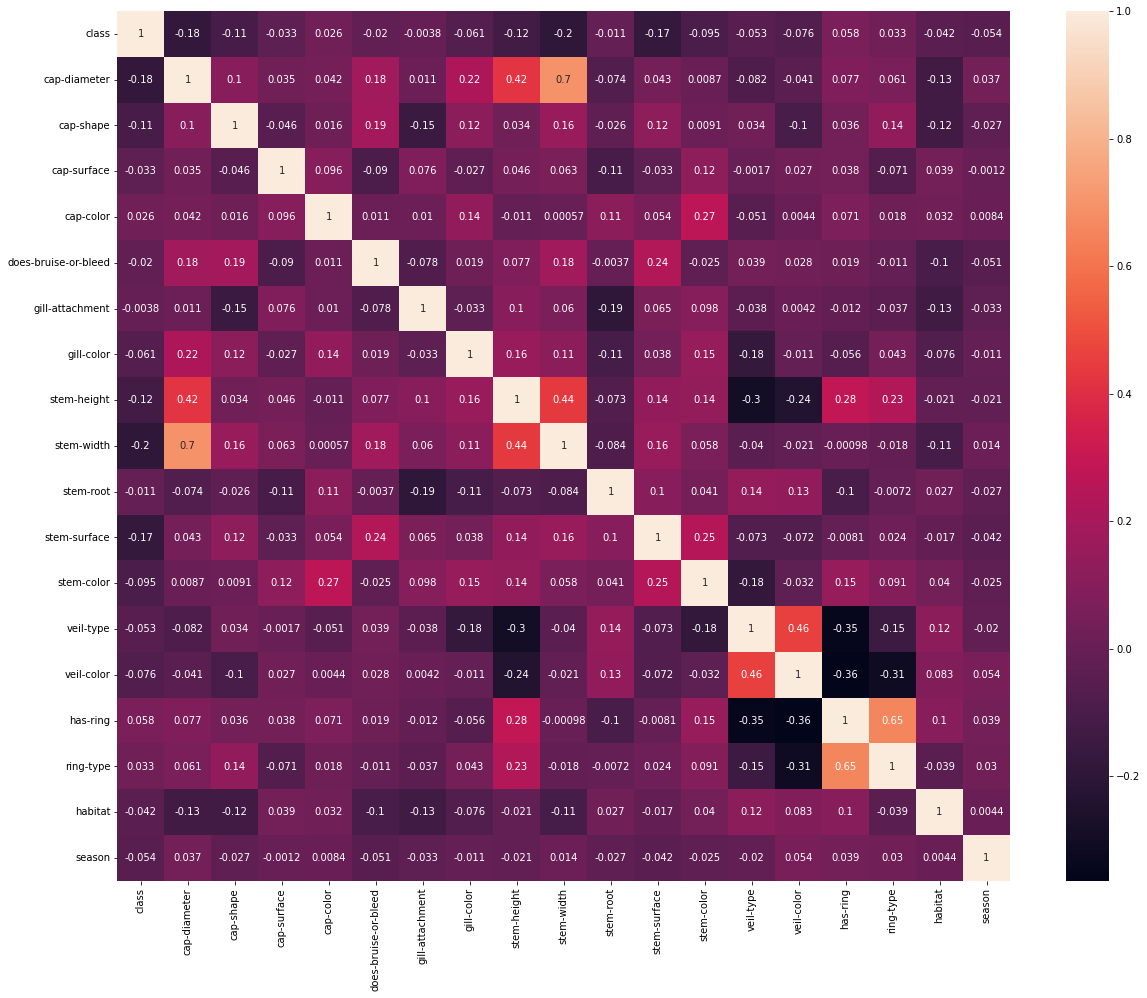

In [6]:
f, ax = plt.subplots(figsize=(20, 16))
corr = df.corr()
sn.heatmap(corr, annot=True)
plt.show()

### Splitting Dataset

In [7]:
xdf=df.copy()
xdf.drop(['class'],axis=1,inplace=True)

In [8]:
ydf=df['class'].copy()
ydf

0        1
1        1
2        1
3        1
4        1
        ..
61064    1
61065    1
61066    1
61067    1
61068    1
Name: class, Length: 61069, dtype: int64

In [9]:
X_train, X_test,Y_train,Y_test = train_test_split(xdf,ydf,test_size=0.2,random_state=0)

## Naive Bayes Model

In [10]:
NB_model = GaussianNB()
NB_model.fit(X_train,Y_train)

GaussianNB()

In [11]:
Y_hat_NB=NB_model.predict(X_test)
print("Accuracy : {}%".format(accuracy_score(Y_test,Y_hat_NB)*100))
print("Train Accuracy : {}%".format(accuracy_score(Y_train,NB_model.predict(X_train))*100))
print(classification_report(Y_test,Y_hat_NB))

Accuracy : 59.56279679056819%
Train Accuracy : 60.04707808822024%
              precision    recall  f1-score   support

           0       0.53      0.59      0.56      5302
           1       0.66      0.60      0.63      6912

    accuracy                           0.60     12214
   macro avg       0.59      0.60      0.59     12214
weighted avg       0.60      0.60      0.60     12214



### ROC-AUC curve

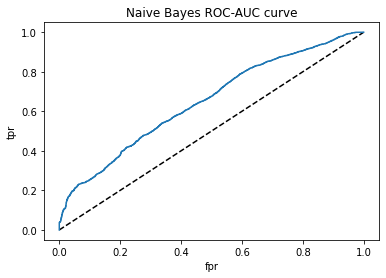

In [51]:
y_pred_proba = NB_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayes ROC-AUC curve')
plt.show()

### Auc Score

In [47]:
roc_auc_score(Y_test,y_pred_proba)

0.6492078952124984

### Confusion matrix

Text(24.0, 0.5, 'Actual')

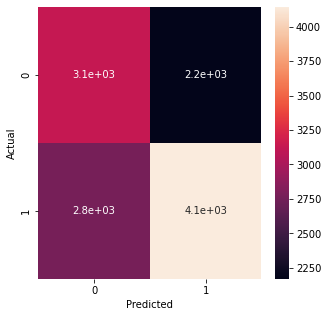

In [12]:
cm=confusion_matrix(Y_test,Y_hat_NB)
plt.figure(figsize=(5,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Logistic Regression Model

In [13]:
LR_model = LogisticRegression(C=0.01,solver='sag')
LR_model.fit(X_train,Y_train)

/Users/aditya/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.01, solver='sag')

In [14]:
Y_hat_LR=LR_model.predict(X_test)
print("Accuracy : {}%".format(accuracy_score(Y_test,Y_hat_LR)*100))
print("Train Accuracy : {}%".format(accuracy_score(Y_train,LR_model.predict(X_train))*100))
print(classification_report(Y_test,Y_hat_LR))

Accuracy : 64.09857540527264%
Train Accuracy : 64.13673114317879%
              precision    recall  f1-score   support

           0       0.61      0.49      0.54      5302
           1       0.66      0.76      0.70      6912

    accuracy                           0.64     12214
   macro avg       0.63      0.62      0.62     12214
weighted avg       0.64      0.64      0.63     12214



### Roc-Auc Curve

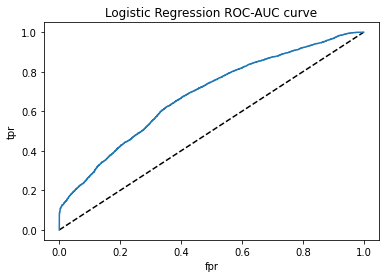

In [45]:
y_pred_proba = LR_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC-AUC curve')
plt.show()

### AUC Score

In [44]:
roc_auc_score(Y_test,y_pred_proba)

0.6815160596280929

### Confusion Matrix

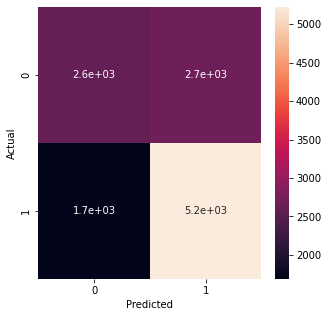

In [15]:
cm=confusion_matrix(Y_test,Y_hat_LR)
plt.figure(figsize=(5,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## KNN Model

In [35]:
Ks=10                                               
train_accuracy =np.zeros((Ks-1))
test_accuracy = np.zeros((Ks-1))
mean_acc=np.zeros((Ks-1))
for n in range(5,Ks):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,Y_train)
    Y_hat_knn=knn.predict(X_test)
    mean_acc[n-1]=accuracy_score(Y_test,Y_hat_knn)
    train_accuracy[n-1] = knn.score(X_train, Y_train)
    test_accuracy[n-1] = knn.score(X_test, Y_test)
print("Max accuracy is: ",mean_acc.max(),"with k=",mean_acc.argmax()+1)




Max accuracy is:  0.9988537743572949 with k= 5


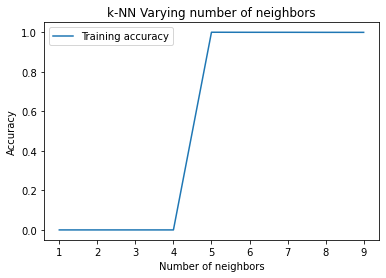

In [41]:
empty= np.arange(1,10)
plt.title('k-NN Varying number of neighbors')
plt.plot(empty, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [37]:
KNN_model=KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1)
KNN_model.fit(X_train,Y_train)
Y_hat_KNN=KNN_model.predict(X_test)
print("Accuracy : {}%".format(accuracy_score(Y_test,Y_hat_KNN)*100))
print("Train Accuracy : {}%".format(accuracy_score(Y_train,KNN_model.predict(X_train))*100))
print(classification_report(Y_test,Y_hat_KNN))


Accuracy : 99.8853774357295%
Train Accuracy : 99.94678129157711%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5302
           1       1.00      1.00      1.00      6912

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



### Roc-Auc Curve

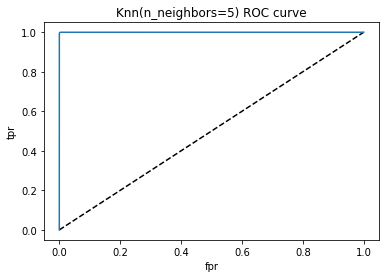

In [38]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC-AUC curve')
plt.show()

### Roc-Auc Score

In [39]:
roc_auc_score(Y_test,y_pred_proba)

0.9998268909705631

### Confusion Matrix

Text(24.0, 0.5, 'Actual')

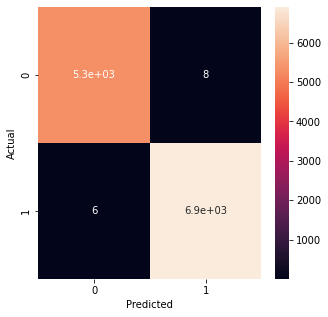

In [40]:
cm=confusion_matrix(Y_test,Y_hat_KNN)
plt.figure(figsize=(5,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Random Forest Model

In [16]:

RF_model = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=0)
RF_model.fit(X_train,Y_train)
Y_hat_RF=RF_model.predict(X_test)
print("Accuracy : {}%".format(accuracy_score(Y_test,Y_hat_RF)*100))
print("Train Accuracy : {}%".format(accuracy_score(Y_train,RF_model.predict(X_train))*100))
print(classification_report(Y_test,Y_hat_RF))



Accuracy : 98.97658424758474%
Train Accuracy : 99.09528195681098%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5302
           1       1.00      0.98      0.99      6912

    accuracy                           0.99     12214
   macro avg       0.99      0.99      0.99     12214
weighted avg       0.99      0.99      0.99     12214



### Confusion matrix

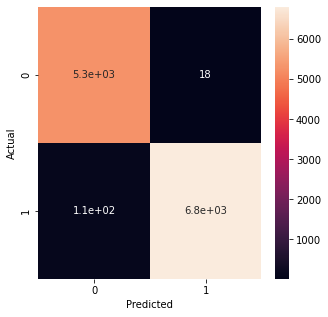

In [17]:
cm=confusion_matrix(Y_test,Y_hat_RF)
plt.figure(figsize=(5,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Decision Tree

In [18]:
DT_model = DecisionTreeClassifier(max_depth=10,random_state=0)
DT_model.fit(X_train,Y_train)
Y_hat_DT=DT_model.predict(X_test)
print("Accuracy : {}%".format(accuracy_score(Y_test,Y_hat_DT)*100))
print("Train Accuracy : {}%".format(accuracy_score(Y_train,DT_model.predict(X_train))*100))
print(classification_report(Y_test,Y_hat_DT))


Accuracy : 95.82446373014574%
Train Accuracy : 96.0802374373145%
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5302
           1       0.96      0.96      0.96      6912

    accuracy                           0.96     12214
   macro avg       0.96      0.96      0.96     12214
weighted avg       0.96      0.96      0.96     12214



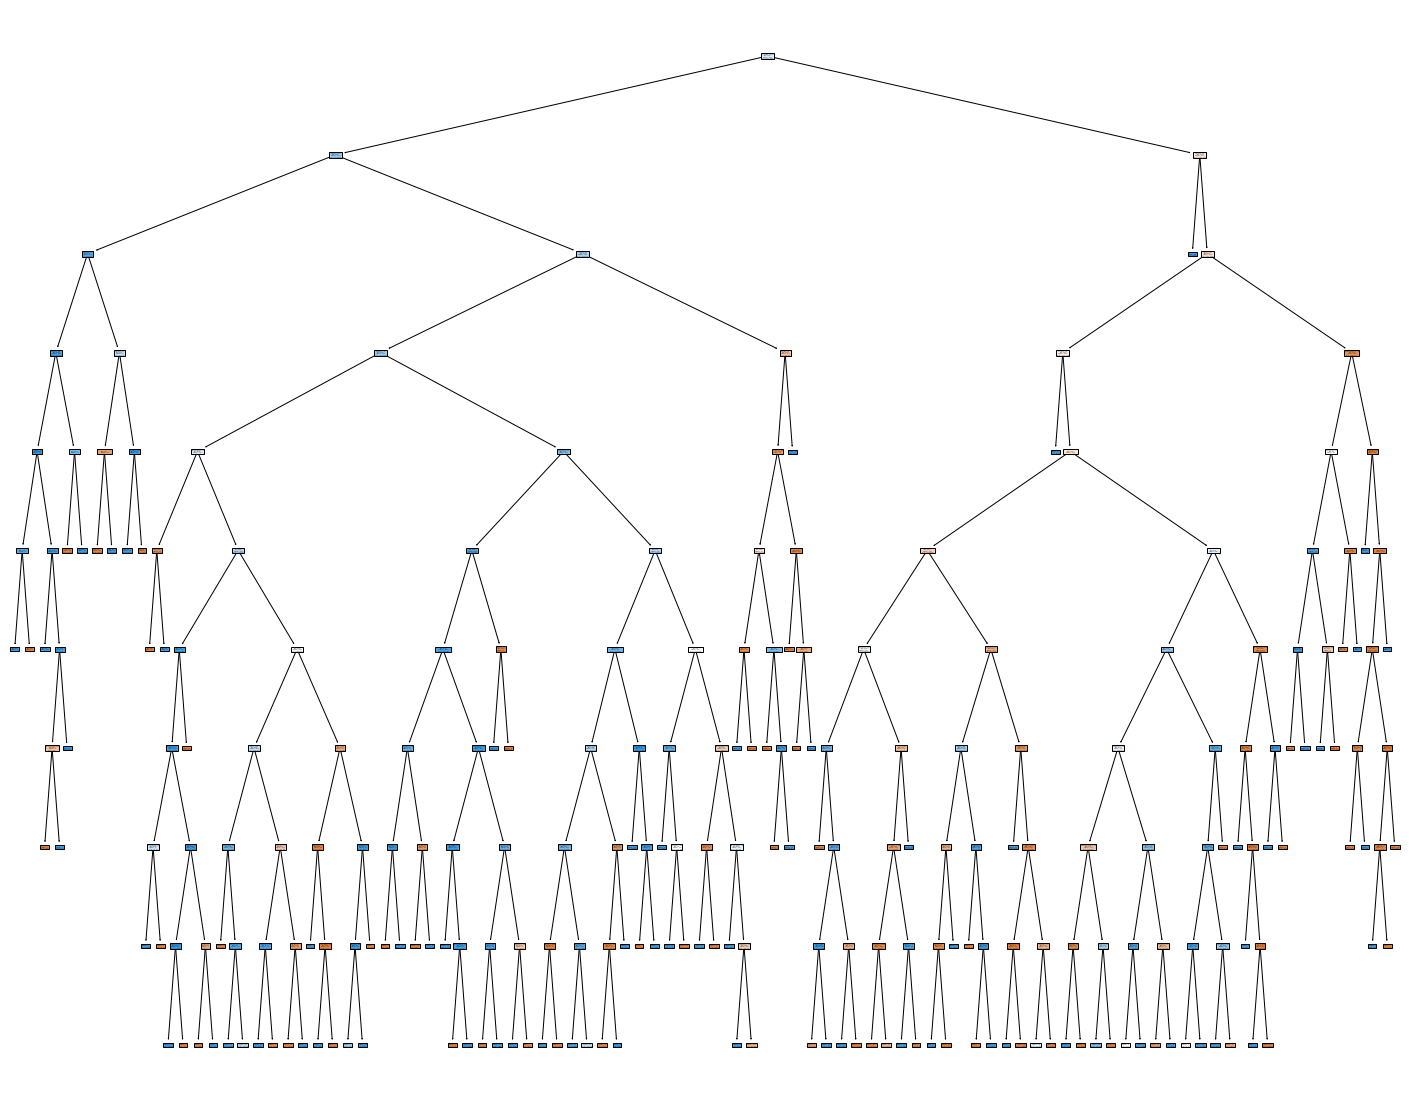

In [52]:
feature_names=df.columns[:-1]
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(DT_model,feature_names=feature_names,filled=True)
fig.savefig('DT.png')
plt.show()

### Confusion Matrix

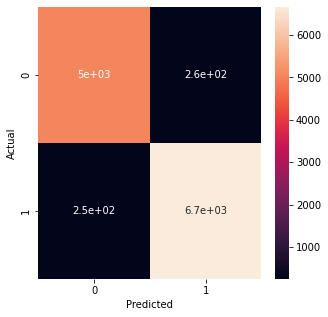

In [21]:
cm=confusion_matrix(Y_test,Y_hat_DT)
plt.figure(figsize=(5,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Stochastic Gradient Descent Model

In [28]:
from sklearn.linear_model import SGDClassifier
sgd_model= SGDClassifier(loss= 'modified_huber', shuffle=True, random_state=1)
sgd_model.fit(X_train, Y_train)
Y_hat_SGD=sgd_model.predict(X_test)

In [29]:
print("Accuracy : {}%".format(accuracy_score(Y_test,Y_hat_SGD)*100))
print("Train Accuracy : {}%".format(accuracy_score(Y_train,sgd_model.predict(X_train))*100))
print(classification_report(Y_test,Y_hat_SGD))

Accuracy : 63.97576551498281%
Train Accuracy : 63.10306007573432%
              precision    recall  f1-score   support

           0       0.64      0.38      0.48      5302
           1       0.64      0.84      0.72      6912

    accuracy                           0.64     12214
   macro avg       0.64      0.61      0.60     12214
weighted avg       0.64      0.64      0.62     12214



### ROC-AUC Curve

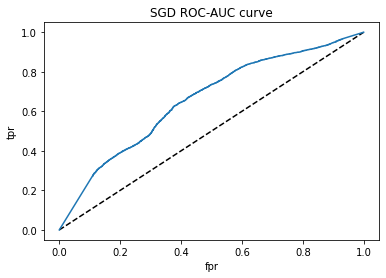

In [48]:
y_pred_proba = sgd_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('SGD ROC-AUC curve')
plt.show()

### Roc-Auc Score

In [49]:
roc_auc_score(Y_test,y_pred_proba)

0.6576904013771883

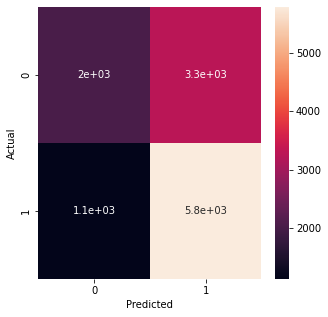

In [31]:
cm=confusion_matrix(Y_test,Y_hat_SGD)
plt.figure(figsize=(5,5))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Final Accuracies of All the Models

In [42]:
data = [['Naive Bayes', accuracy_score(Y_train,NB_model.predict(X_train))*100,accuracy_score(Y_test,Y_hat_NB)*100], ['Logistic Regression',accuracy_score(Y_train,LR_model.predict(X_train))*100,accuracy_score(Y_test,Y_hat_LR)*100 ], ['KNN',accuracy_score(Y_train,KNN_model.predict(X_train))*100,accuracy_score(Y_test,Y_hat_KNN)*100 ],['Random Forest',accuracy_score(Y_train,RF_model.predict(X_train))*100,accuracy_score(Y_test,Y_hat_RF)*100],['Decision Tree',accuracy_score(Y_train,DT_model.predict(X_train))*100,accuracy_score(Y_test,Y_hat_DT)*100],['SGD Method', accuracy_score(Y_train,sgd_model.predict(X_train))*100,accuracy_score(Y_test,Y_hat_SGD)*100]]
 
accuracy_matrix = pd.DataFrame(data, columns = ['Algo Used', 'Train Accuracy','Test Accuracy'],index=['1','2','3','4','5','6'])

accuracy_matrix

,Algo Used,Train Accuracy,Test Accuracy
1,Naive Bayes,60.047078,59.562797
2,Logistic Regression,64.136731,64.098575
3,KNN,99.946781,99.885377
4,Random Forest,99.095282,98.976584
5,Decision Tree,96.080237,95.824464
6,SGD Method,63.103060,63.975766


### By Looking at the above table it is clear that KNN has the best accuracy for the given data set